# Testing Freq-BoA separated output models

In [1]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, cbar = False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    if cbar == True:
        plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Prediction for Sinusoidal Signal

In [4]:
dir = "/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds"

## one model two outputs

In [ ]:
model = keras.models.load_model("/Volumes/KleeFD/models/Chirp/one model two outputs.h5")

In [5]:
model = keras.models.load_model("/Volumes/KleeFD/models/Chirp/one model two outputs.h5")

In [6]:
test_X = np.load(dir + '/test_X.npy')
freq = (np.load(dir + '/test_Y.npy'))[:,1]
boa = (np.load(dir + '/test_Y.npy'))[:,0]

In [7]:
# Get Predictions
pred_proba = model.predict(test_X)

53/53 [==============================] - 3s 37ms/step


In [8]:
pred_proba_boa = pred_proba[1]
pred_proba_freq = pred_proba[0]

# proba -> get highest prba
boa_pred_idx = np.argmax(pred_proba_boa, axis = 1)
freq_pred_idx = np.argmax(pred_proba_freq, axis = 1)

In [10]:
boa_cat = np.array([25.0, 30.0])

freq_cat = np.array([0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])

# Change the index to name of category
freq_idx = []
boa_idx = []

for b,f in zip(boa, freq):
    boa_idx.append(np.where(boa_cat == b)[0][0])
    freq_idx.append(np.where(freq_cat == f)[0][0])
    
freq_idx = np.array(freq_idx)
boa_idx = np.array(boa_idx)

### Frequency Results

Confusion matrix, without normalization


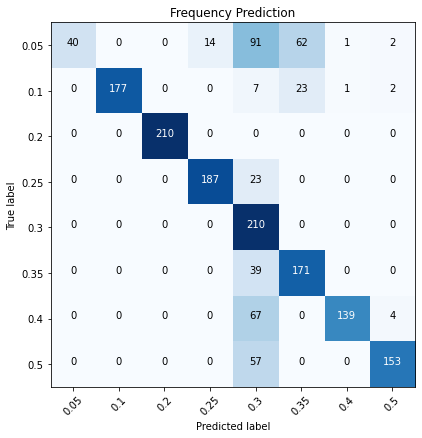

              precision    recall  f1-score   support

           0       1.00      0.19      0.32       210
           1       1.00      0.84      0.91       210
           2       1.00      1.00      1.00       210
           3       0.93      0.89      0.91       210
           4       0.43      1.00      0.60       210
           5       0.67      0.81      0.73       210
           6       0.99      0.66      0.79       210
           7       0.95      0.73      0.82       210

    accuracy                           0.77      1680
   macro avg       0.87      0.77      0.76      1680
weighted avg       0.87      0.77      0.76      1680

ACCURACY : 76.60714285714286


In [11]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(freq_idx, freq_pred_idx)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes = freq_cat, normalize=False,
                      title='Frequency Prediction')
plt.show()

# Classification Report & Accuracy
print(classification_report(freq_idx, freq_pred_idx, zero_division = 0))

a = np.array(freq_idx == freq_pred_idx)

correct = 0

for boolean in a:
    if boolean == True:
        correct += 1
print('='*40)
print("ACCURACY :", correct/len(a)*100)

### BoA Results

Confusion matrix, without normalization


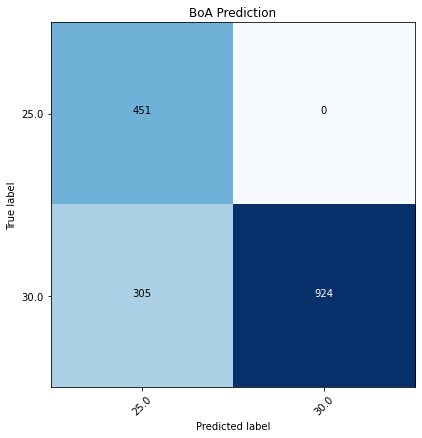

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       451
           1       1.00      0.75      0.86      1229

    accuracy                           0.82      1680
   macro avg       0.80      0.88      0.80      1680
weighted avg       0.89      0.82      0.83      1680

ACCURACY : 81.84523809523809


In [12]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(boa_idx, boa_pred_idx)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes = boa_cat, normalize=False,
                      title='BoA Prediction')
plt.show()

# Classification Report & Accuracy
print(classification_report(boa_idx, boa_pred_idx, zero_division = 0))

a = np.array(boa_idx == boa_pred_idx)

correct = 0

for boolean in a:
    if boolean == True:
        correct += 1
print('='*40)
print("ACCURACY :", correct/len(a)*100)

## two separate models for boa and freq

In [16]:
boa_model = keras.models.load_model("/Volumes/KleeFD/models/Chirp/two models boa.h5")

In [17]:
freq_model = keras.models.load_model("/Volumes/KleeFD/models/Chirp/two models freq.h5")

In [18]:
test_X = np.load(dir + '/test_X.npy')
freq = (np.load(dir + '/test_Y.npy'))[:,1]
boa = (np.load(dir + '/test_Y.npy'))[:,0]

In [19]:
# Get Predictions
pred_proba_boa = boa_model.predict(test_X)
pred_proba_freq = freq_model.predict(test_X)

53/53 [==============================] - 2s 34ms/step


In [20]:
# proba -> get highest prba
boa_pred_idx = np.argmax(pred_proba_boa, axis = 1)
freq_pred_idx = np.argmax(pred_proba_freq, axis = 1)

In [21]:
boa_cat = np.array([25.0, 30.0])

freq_cat = np.array([0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])

# Change the name to index of category
freq_idx = []
boa_idx = []

for b,f in zip(boa, freq):
    boa_idx.append(np.where(boa_cat == b)[0][0])
    freq_idx.append(np.where(freq_cat == f)[0][0])
    
freq_idx = np.array(freq_idx)
boa_idx = np.array(boa_idx)

### Frequency Results

Confusion matrix, without normalization


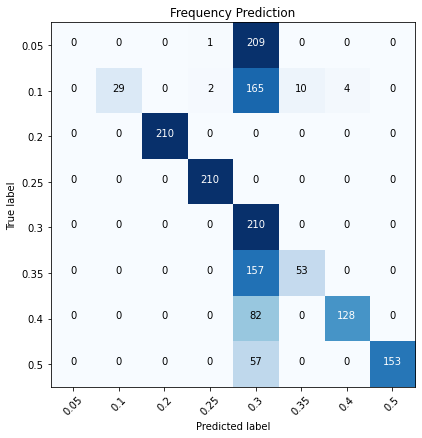

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       210
           1       1.00      0.14      0.24       210
           2       1.00      1.00      1.00       210
           3       0.99      1.00      0.99       210
           4       0.24      1.00      0.39       210
           5       0.84      0.25      0.39       210
           6       0.97      0.61      0.75       210
           7       1.00      0.73      0.84       210

    accuracy                           0.59      1680
   macro avg       0.75      0.59      0.58      1680
weighted avg       0.75      0.59      0.58      1680

ACCURACY : 59.10714285714286


In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(freq_idx, freq_pred_idx)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes = freq_cat, normalize=False,
                      title='Frequency Prediction')
plt.show()

# Classification Report & Accuracy
print(classification_report(freq_idx, freq_pred_idx, zero_division = 0))

a = np.array(freq_idx == freq_pred_idx)

correct = 0

for boolean in a:
    if boolean == True:
        correct += 1
print('='*40)
print("ACCURACY :", correct/len(a)*100)

### BoA Results

Confusion matrix, without normalization


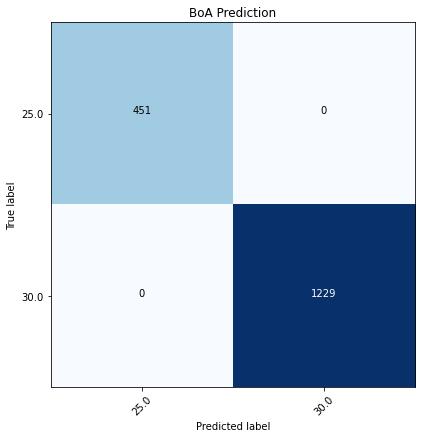

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00      1229

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

ACCURACY : 100.0


In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(boa_idx, boa_pred_idx)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes = boa_cat, normalize=False,
                      title='BoA Prediction')
plt.show()

# Classification Report & Accuracy
print(classification_report(boa_idx, boa_pred_idx, zero_division = 0))

a = np.array(boa_idx == boa_pred_idx)

correct = 0

for boolean in a:
    if boolean == True:
        correct += 1
print('='*40)
print("ACCURACY :", correct/len(a)*100)